# Project 13 - Doctor's Consultation Fee

Objective - To develop an ML model for predicting doctor's consultation fee based on features like specialization, experience & location etc

Approach - Since our target variable is continous in nature hence a regression model will be more suitable for making good predicitions 

# Importing required libraries

# Importing dataset

In [969]:
dftr = pd.read_excel('D_Final_Train.xlsx')

<IPython.core.display.Javascript object>

In [970]:
dfte = pd.read_excel('D_Final_Test.xlsx')

<IPython.core.display.Javascript object>

In [971]:
dfs = pd.read_excel('D_Sample_submission.xlsx')

<IPython.core.display.Javascript object>

# Loading datasets

In [972]:
dftr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [973]:
dfte.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [974]:
dfs.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


# Performing EDA

In [975]:
dfte = pd.concat([dfte,dfs], axis =1) # Concatinating sample cost & test dataset

<IPython.core.display.Javascript object>

In [976]:
# Identifiers for each dataset
dfte['Identify']= 'Test'
dftr['Identify']='Train'

In [977]:
d_fe = pd.concat([dftr,dfte], ignore_index = True) # Concatinating both datasets (test & Train)

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   object
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
 7   Identify            7948 non-null   object
dtypes: int64(1), object(7)
memory usage: 496.9+ KB
Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                     0
Identify                 0
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

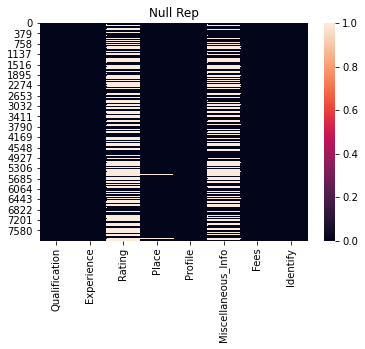

In [978]:
d_fe.info() # Dataset info

# Checking Null Values
print(d_fe.isnull().sum())
plt.title('Null Rep')
sns.heatmap(d_fe.isnull())
plt.show()

In [979]:
# All column names
d_fe.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Identify'],
      dtype='object')

In [980]:
# Lets eliminate white spaces for the ease of processing data
list = ['Qualification','Place', 'Profile','Identify']
for i in list:
    d_fe[i] = d_fe[i].str.replace(' ', '')

In [981]:
# Function to analyse columns
def cat_ana(df, x = None):
    series = df[x]
    print('+' *80)
    print(f'Details of {x}')
    print(f'Stats summary \n{series.describe()}')
    print('+' *80)
    print(f'Null values \n{series.isnull().sum()}')
    print('+' *80)
    print(f'Series value count is \n{series.value_counts()}')
    print('+' *80)
    print(f'Unique values \n{series.unique()}')

In [982]:
list = ['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info', 'Fees']
for i in list:
    cat_ana(d_fe, x = i)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Details of Qualification
Stats summary 
count     7948
unique    1801
top        BDS
freq       632
Name: Qualification, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Null values 
0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
BDS                                                                            632
BHMS                                                                           627
BAMS                                                                           624
MBBS                                                                           441
MBBS,MS-ENT                                                                    280
                                                                              ... 
MBBS,DDVL,DNB-Dermatology&Venereology,MNAMS(MembershipoftheNationalAcademy)      1
BDS

In [983]:
# Cleaning 'Qualification' columns
d_fe_qual = pd.DataFrame(d_fe['Qualification'].str.split(',|-').tolist())
d_fe_qual.columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18']
d_fe_qual.drop(['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11','Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18'],
               axis = 1, inplace =True)
d_fe_qual.replace('None', 'Missing', inplace = True)
d_fe_qual.replace(np.NaN, 'Missing', inplace = True)
# Cleaning 'Experience' columns
d_fe_exp = pd.DataFrame(d_fe['Experience'].str.split(' ').tolist())
d_fe_exp.columns = ['Exp','E1','E2']
d_fe_exp.drop(['E1','E2'], axis =1, inplace = True)
# Cleaning 'Rating' columns
d_fe['Rating'] = d_fe['Rating'].astype(str)
d_fe_ra = pd.DataFrame(d_fe['Rating'].str.split('%').tolist())
d_fe_ra.columns = ['R1','R2']
d_fe_ra.drop(['R2'], axis =1, inplace =True)
d_fe_ra.replace('nan', np.NaN, inplace = True)
# Cleaning 'Place' columns
d_fe['Place'] = d_fe['Place'].astype(str)
d_fe_pal = pd.DataFrame(d_fe['Place'].str.split(',').tolist())
d_fe_pal.columns=['Area','City','P1']
d_fe_pal.drop('P1', axis = 1, inplace = True)
d_fe_pal.replace([np.NaN,'e','nan'], 'Missing', inplace = True)
d_fe_pal.replace('Sector5','Delhi', inplace = True)
# Cleaning 'Miscellaneous_Info' columns & extracting no of feedbacks Feedback received
import re
def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0
    
    
    
d_fe['feedack_num'] =d_fe.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [984]:
# Building the final dataset
d_fe = pd.concat([d_fe,d_fe_qual,d_fe_exp,d_fe_ra,d_fe_pal], axis =1)
# Droping duplicated information
d_fe.drop(['Qualification', 'Experience', 'Rating', 'Place','Miscellaneous_Info'], axis = 1, inplace =True)

<IPython.core.display.Javascript object>

In [985]:
d_fe.sample(10) # Checking the final dataset

,Profile,Fees,Identify,feedack_num,Q1,Q2,Q3,Q4,Exp,R1,Area,City
1056,Dentist,500,Train,0,BDS,MDS,ConservativeDentistry&Endodontics,Missing,10,98,GhatkoparEast,Mumbai
4262,Dentist,300,Train,62,BDS,MDS,Oral&MaxillofacialSurgery,Missing,38,97,AnnaNagar,Chennai
6053,Dentist,2366,Test,0,BDS,MDS,OrthodonticsandDentofacialOrthopaedics,Missing,5,NaN,Dadar,Mumbai
3208,Homeopath,300,Train,0,BHMS,MD,Homeopathy,Missing,6,NaN,TNagar,Chennai
112,Dermatologists,500,Train,13,MBBS,DiplomainDermatology,Missing,Missing,11,90,Indiranagar,Bangalore
7561,ENTSpecialist,2111,Test,80,MBBS,DNB,ENT,Missing,11,99,OldAirportRoad,Bangalore
7121,Dermatologists,1884,Test,2,MBBS,MD,Dermatology,Venereology&Leprosy,10,100,Rohini,Delhi
7416,GeneralMedicine,2603,Test,0,MBBS,MD,CommunityMedicine,Missing,25,NaN,Pitampura,Delhi
7342,Ayurveda,2833,Test,0,BAMS,Missing,Missing,Missing,13,NaN,Sakinaka,Mumbai
7283,Dermatologists,1311,Test,149,MD,Skin&VD,MBBS,Missing,26,95,Koramangala,Bangalore


In [986]:
# Replacing NaN Values
d_fe.replace(np.NaN, 'Missing', inplace = True)
indexNames = d_fe[d_fe['City'] == 'Missing'].index
d_fe.drop(indexNames , inplace=True)
# Filling Missing values in Rating column by Mean ratings in City
d_fe['R1'] = d_fe.groupby('City').transform(lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>

In [987]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
val = ['Profile', 'feedack_num', 'Q1', 'Q2', 'Q3', 'Q4','Exp', 'R1', 'Area', 'City']
for i in val:
    d_fe[i] = le.fit_transform(d_fe[i].astype(str))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

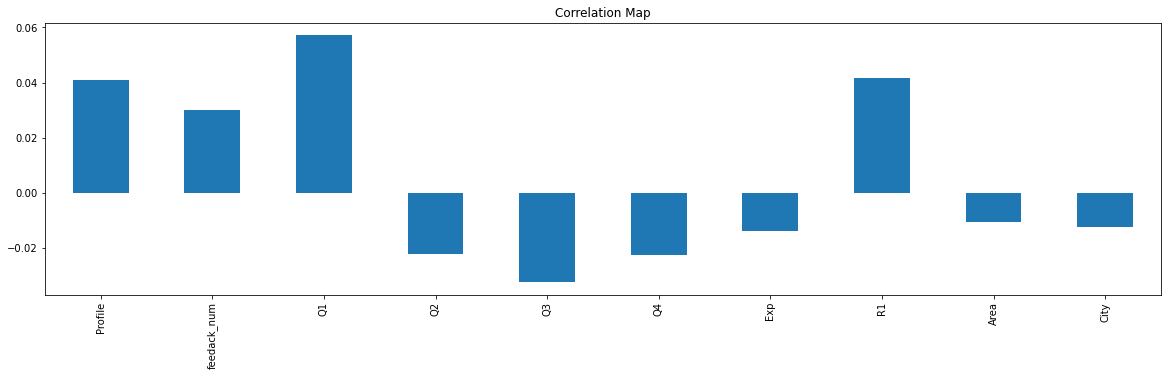

In [988]:
plt.figure(figsize = (20,5))
d_fe.drop(['Fees'], axis = 1).corrwith(d_fe['Fees']).plot(kind = 'bar')
plt.title('Correlation Map')
plt.show()

# Building the model

In [990]:
#Importing required libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

In [991]:
# Segrigating data into x & y
train = d_fe.loc[d_fe['Identify']== 'Train']
test = d_fe.loc[d_fe['Identify']== 'Test']
x = (train.drop(['Fees','Identify'], axis = 1)).astype(int)
y = train['Fees']
testy = (test.drop(['Fees','Identify'], axis = 1))
y_pred = test['Fees']

In [992]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    r2s = r2_score(y_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {accu *100}%')

The best random state is 56 with accuracy is 63.899130614315204%


In [993]:
#Identifying best Algorithm
import warnings
warnings.filterwarnings('ignore')
models=[LinearRegression(),Lasso(alpha =0.001),Ridge(alpha =0.1), 
      ElasticNet(alpha =0.001), RandomForestRegressor(),
      AdaBoostRegressor(), DecisionTreeRegressor(), XGBRegressor(), GradientBoostingRegressor()]
for m in models:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 56)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

For algorithm LinearRegression() R2 Score is 63.899130614315204
For algorithm LinearRegression() mean Sqr Error is 1272045.2031672222
For algorithm LinearRegression() mean abs. error is 8187.125334326713
For algorithm LinearRegression() cross validation score is 58.98352452336874
Difference between r2 score & cv score = 4.915606090946461

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Lasso(alpha=0.001) R2 Score is 63.899112009194745
For algorithm Lasso(alpha=0.001) mean Sqr Error is 1272045.8587346536
For algorithm Lasso(alpha=0.001) mean abs. error is 8187.126298774052
For algorithm Lasso(alpha=0.001) cross validation score is 58.98352500506272
Difference between r2 score & cv score = 4.915587004132028

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Ridge(alpha=0.1) R2 Score is 63.899129223705174
For algorithm Ridge(alpha=0.1) mean Sqr Error is 1272045.252166563
F

In [994]:
# Hyperparameter Training
from sklearn.model_selection import GridSearchCV
parameters = {'booster':['gbtree', 'gblinear','dart']}
clf = GridSearchCV(XGBRegressor(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'booster': 'dart'}

In [995]:
#Building the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 56)
xgbr = XGBRegressor(booster= 'dart')
xgbr.fit(x_train,y_train)
pred = xgbr.predict(x_test)
cv_score = cross_val_score(xgbr,x,y,cv= 10).mean()
print(f'R2 Score is {(r2_score(y_test,pred)*100)}')
print(f'Mean Sqr Error is {round(mean_squared_error(y_test,pred)*100)}')
print(f'Mean abs. error is {round(mean_absolute_error(y_test,pred)*100)}')
print(f'Cross validation score is {(cv_score*100)}')
print(f'Difference between r2 score & cv score = {((r2_score(y_test,pred)*100)-(cv_score*100))}\n')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

R2 Score is 99.99579668557612
Mean Sqr Error is 148.0
Mean abs. error is 10.0
Cross validation score is 99.79866335407046
Difference between r2 score & cv score = 0.19713333150566825

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Saving the best Model

In [996]:
import joblib
joblib.dump(xgbr,'Doctors_Fees.obj')

['Doctors_Fees.obj']

In [997]:
doc_pred = joblib.load('Doctors_Fees.obj')

# Testing the model

In [998]:
y_test_pred = doc_pred.predict(testy)

<IPython.core.display.Javascript object>

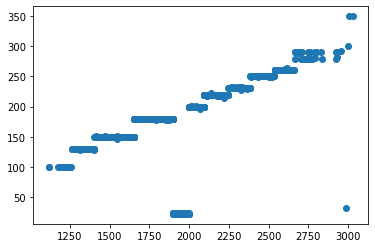

In [999]:
plt.scatter(y_pred,y_test_pred)

In [1000]:
print(f'R2 Score is {r2_score(y_pred,y_test_pred)*100}')
print(f'Mean Sqr Error is {mean_squared_error(y_pred,y_test_pred)*100}')
print(f'Mean abs. error is {mean_absolute_error(y_pred,y_test_pred)*100}')

R2 Score is -2543.627922078072
Mean Sqr Error is 325580675.56482184
Mean abs. error is 177602.94005438752


In [1001]:
x_test_pred = doc_pred.predict(x)

<IPython.core.display.Javascript object>

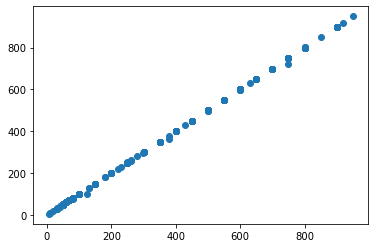

In [1002]:
plt.scatter(y,x_test_pred)

In [1003]:
print(f'R2 Score is {r2_score(y,x_test_pred)*100}')
print(f'Mean Sqr Error is {mean_squared_error(y,x_test_pred)*100}')
print(f'Mean abs. error is {mean_absolute_error(y,x_test_pred)*100}')

R2 Score is 99.99910252881308
Mean Sqr Error is 32.68925079646439
Mean abs. error is 3.630132811754415


# Conclusion : The information contained in the dataset is highly complex in nature, hence it took significant effort to clean the data. Though the effort paid up & could acheive 99% efficiency with XGBRegressor and a model has been developed for the same. Though the model still has significant scope for further cleaning data and improving score